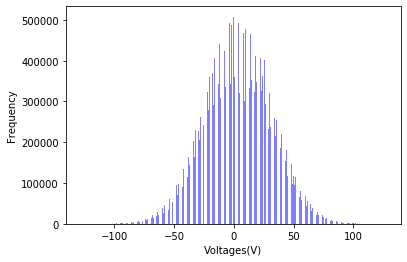

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft


north_data=np.array(np.loadtxt('vela_Pulsar.mbr',usecols=(0)))

north_data_r=np.reshape(north_data,(512,-1),order='F')


num_bins = 500
n, bins, patches = plt.hist(north_data, num_bins, facecolor='blue', alpha=0.5);plt.xlabel('Voltages(V)');plt.ylabel('Frequency')
plt.show()

Loading the Pulsar data into a linear array named north_data and plotting the histogram of time variant voltage data.
Then reshaping above array into a $512*60000$ sized array for further computation

C:\Users\Sidharth S Nair\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


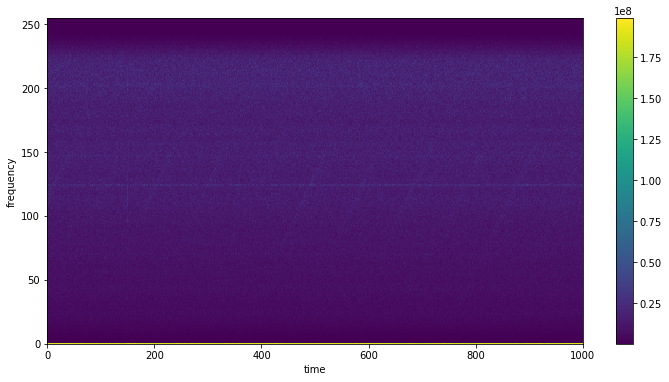

In [7]:
x2=np.zeros((512,60000))    #initialising an array to hold the fourier transformed values
for i in range(60000):
    x2[:,i]=fft(north_data_r[:,i])    #doing columnwise fourier transform to the reshaped array
x3=np.power(abs(x2),2)

x5=np.zeros((512,1000))
for i in range(1000):
    x5[:,i]=np.sum(x3[:,60*i:60*(i+1)-1],axis=1)
fig=plt.figure()
plt.rcParams['figure.figsize']=(20,6)

plt.pcolormesh(x5[0:255,:]);
plt.xlabel("Time(ms)")
plt.ylabel("Frequency(Hz)")
plt.colorbar(orientation='vertical')
fig.savefig("vela pulsar2.jpg",bbox_inches="tight")
plt.show()


C:\Users\Sidharth S Nair\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


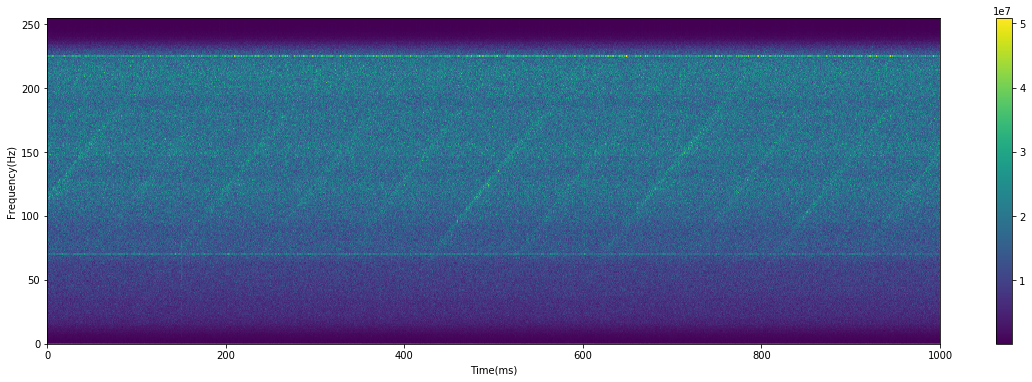

In [8]:
y=np.array(np.loadtxt('vela_Pulsar.mbr',usecols=(1)))
y1=np.reshape(y,(512,-1),order='F')

y2=np.zeros((512,60000))
for i in range(60000):
    y2[:,i]=fft(y1[:,i])
y3=np.power(abs(y2),2)

y5=np.zeros((512,1000))
for i in range(1000):
    y5[:,i]=np.sum(y3[:,60*i:60*(i+1)-1],axis=1)
fig=plt.figure()
plt.rcParams['figure.figsize']=(12,6)

plt.pcolormesh(y5[0:255,:]);
plt.xlabel("Time(ms)")
plt.ylabel("Frequency(Hz)")
plt.colorbar(orientation='vertical')
fig.savefig("vela pulsar2.jpg",bbox_inches="tight")
plt.show()

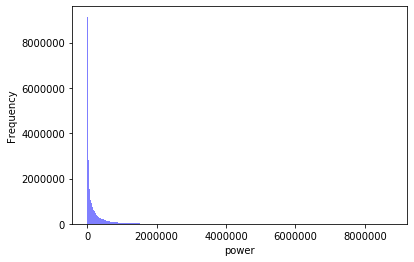

In [5]:
x3=np.reshape(x3,(512*60000,))
fig=plt.figure()
num_bins = 500

n, bins, patches = plt.hist(x3, num_bins, facecolor='blue', alpha=0.5);plt.xlabel('power');plt.ylabel('Frequency')
fig.savefig("power-freq.png",bbox_inches='tight')
plt.show()